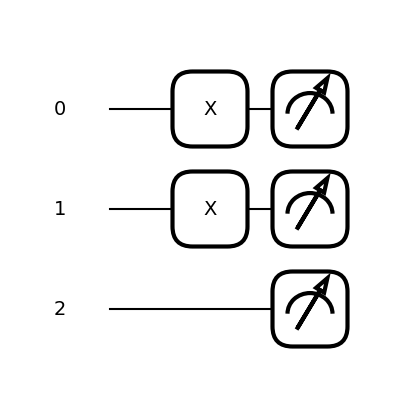

In [1]:
import pennylane as qml
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
@qml.compile()
def basis_embedding_circuit(m):
    qml.BasisEmbedding(m, wires=range(3))
    return qml.state()

m = 6 # number to be encoded

qml.draw_mpl(basis_embedding_circuit, show_all_wires=True)(m)
plt.show()

In [2]:
import pennylane as qml
from pennylane import numpy as np

n_wires = 4
dev = qml.device("default.qubit", wires=n_wires, shots=1)

def add_k_fourier(k, wires):
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])

@qml.qnode(dev)
def sum(m, k):
    qml.BasisEmbedding(m, wires=range(n_wires))  # m encoding

    qml.QFT(wires=range(n_wires))  # step 1

    add_k_fourier(k, range(n_wires))  # step 2

    qml.adjoint(qml.QFT)(wires=range(n_wires))  # step 3

    return qml.sample()


print(f"The ket representation of the sum of 3 and 4 is {sum(3,4)}")

The ket representation of the sum of 3 and 4 is [0 1 1 1]


The ket representation of the sum of 7 and 3 is [1 0 1 0]


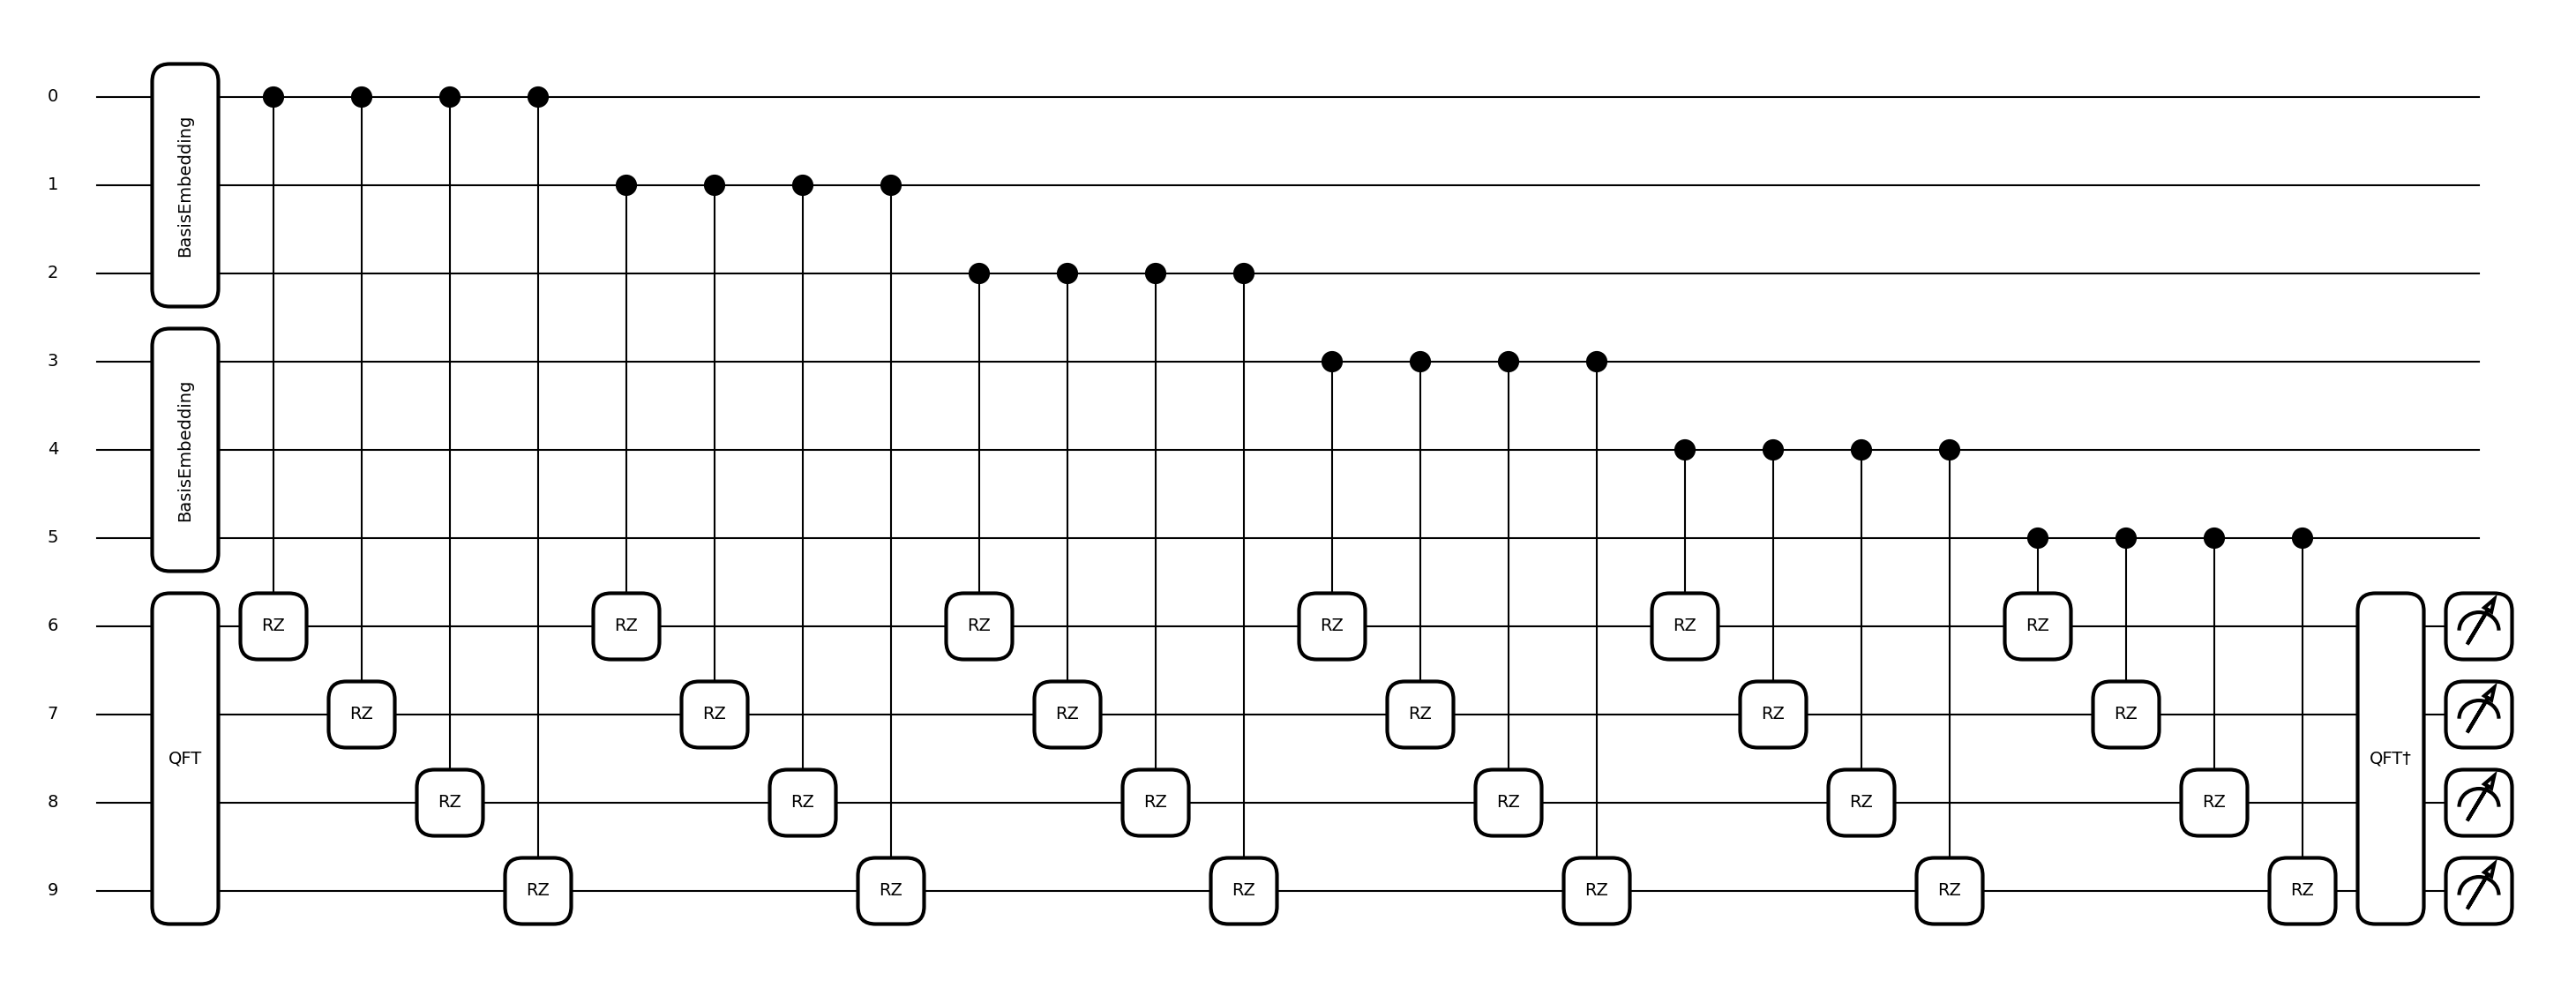

In [3]:
wires_m = [0, 1, 2]             # qubits needed to encode m
wires_k = [3, 4, 5]             # qubits needed to encode k
wires_solution = [6, 7, 8, 9]   # qubits needed to encode the solution

dev = qml.device("default.qubit", wires=wires_m + wires_k + wires_solution, shots=1)

n_wires = len(dev.wires) # total number of qubits used

def addition(wires_m, wires_k, wires_solution):
    # prepare solution qubits to counting
    qml.QFT(wires=wires_solution)

    # add m to the counter
    for i in range(len(wires_m)):
        qml.ctrl(add_k_fourier, control=wires_m[i])(2 **(len(wires_m) - i - 1), wires_solution)

    # add k to the counter
    for i in range(len(wires_k)):
        qml.ctrl(add_k_fourier, control=wires_k[i])(2 **(len(wires_k) - i - 1), wires_solution)

    # return to computational basis
    qml.adjoint(qml.QFT)(wires=wires_solution)

@qml.qnode(dev)
def sum2(m, k, wires_m, wires_k, wires_solution):
    # m and k codification
    qml.BasisEmbedding(m, wires=wires_m)
    qml.BasisEmbedding(k, wires=wires_k)

    # apply the addition circuit
    addition(wires_m, wires_k, wires_solution)

    return qml.sample(wires=wires_solution)

print(f"The ket representation of the sum of 7 and 3 is "
      f"{sum2(7, 3, wires_m, wires_k, wires_solution)}")

qml.draw_mpl(sum2, show_all_wires=True)(7, 3, wires_m, wires_k, wires_solution)
plt.show()